<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import re
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [38]:
# бывает, что в VS Code через ноутбук plotly брыкается, поэтому:
import plotly.io as pio
pio.renderers.default = 'notebook_connected'

# Исследование структуры данных

1) Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [39]:
# читаем данные
hh_data_df = pd.read_csv('data/dst-3.0_16_1_hh_database.csv.zip', sep=';', compression='zip')

# копию, работаем дальше с копией
# hh_data_df = hh_data.copy()

2) Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [40]:
#выводим немного датафрейма
hh_data_df.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


3) Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [41]:
hh_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4) Обратите внимание на информацию о числе непустых значений.

In [42]:
# кол-во пустых значений
cols_null_number = hh_data_df.isnull().sum()  
cols_with_null = cols_null_number[cols_null_number>0].sort_values(ascending=False)
print('Кол-во пропусков:')
display(cols_with_null)

# процент пропусков
cols_null_percent = hh_data_df.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
print('% пропусков:')
display(cols_with_null)

Кол-во пропусков:


Опыт работы                        168
Последняя/нынешняя должность         2
Последнее/нынешнее место работы      1
dtype: int64

% пропусков:


Опыт работы                        0.375469
Последняя/нынешняя должность       0.004470
Последнее/нынешнее место работы    0.002235
dtype: float64

5) Выведите основную статистическую информацию о столбцах.


In [43]:
hh_data_df.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1) Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [44]:
# Будем искать подстроки в исходной строке и в зависимости от этого установим категорию образования
def edu_cat(education_str):
    
    if 'Неоконченное высшее образование' in education_str:
        return 'неоконченное высшее'
    elif 'Высшее образование' in education_str:
        return 'высшее'
    elif 'Среднее специальное образование' in education_str:
        return 'среднее специальное'
    elif 'Среднее образование' in education_str:
        return 'среднее'
    return 'другое'
    
# Применим функцию к новому столбцу "Образование", выведем полученный столбец и удалим исходный
hh_data_df['Образование'] = hh_data_df['Образование и ВУЗ'].apply(edu_cat)
mid_edu = hh_data_df['Образование'].value_counts()['среднее']
print(f'Соискателей со средним образованием: {mid_edu}')
hh_data_df = hh_data_df.drop(['Образование и ВУЗ'], axis=1)

Соискателей со средним образованием: 559


2) Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [45]:
def get_sex(arg):
    return 'Ж' if 'Жен' in arg else 'М'

def get_age(arg):
    arg_split = arg.split(' ')
    age_words = ['года', 'год', 'лет',]
    for ind, age in enumerate(arg_split):
        if age in age_words:
            return int(arg_split[ind-1])

hh_data_df['Пол'] = hh_data_df['Пол, возраст'].apply(get_sex)          
hh_data_df['Возраст'] = hh_data_df['Пол, возраст'].apply(get_age)

women_count = hh_data_df['Пол'].value_counts(normalize=True)['Ж']*100
print(f'Резюме женщин: {round(women_count, 2)}%')

age_mean = hh_data_df['Возраст'].mean()
print(f'Средний возраст подавших резюме = {round(age_mean, 2)}')

hh_data_df = hh_data_df.drop('Пол, возраст', axis=1)

Резюме женщин: 19.07%
Средний возраст подавших резюме = 32.2


3) Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [46]:
# Подсчёт опыта в месяцах
def exp_in_months(arg):

    # если опыт не указан или unparsable, возвращаем пустое значение
    # Понадеемся, что формат описания опыта is consistent throughout
    if (arg is np.nan) or ('Не указан' in arg): return np.nan
    
    # список ['Опыт', 'работы', '1', 'год', '1', 'месяц', и т.д.]
    exp_split = arg.split()[:7]

    # Могут быть варианты слов
    list_years = ('года', 'год', 'лет')
    list_months = ('месяца', 'месяцев', 'месяц')
    years = months = 0
    
    for ind, exp in enumerate(exp_split):
        if exp in list_years: #and exp_split[ind-1].isnumeric():
            years = int(exp_split[ind-1])
        if exp in list_months: #and exp_split[ind-1].isnumeric():
            months = int(exp_split[ind-1])
    return int(years*12 + months)

# Создаём новый столбец, удаляем старый
hh_data_df['Опыт работы (месяц)'] = hh_data_df['Опыт работы'].apply(exp_in_months)
median_exp = hh_data_df['Опыт работы (месяц)'].median()
print(f'Медианный опыт работы по датафрейму = {median_exp} мес.')
hh_data_df = hh_data_df.drop('Опыт работы', axis=1)

Медианный опыт работы по датафрейму = 100.0 мес.


4) Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [47]:
# Категоризируем по городам
def get_city(arg):
    
    million_cities = [
                    'Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань',
                    'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа',
                    'Красноярск', 'Пермь', 'Воронеж', 'Волгоград',
                    ]
    
    # Ловим первое слово в аргументе -> категория
    city = str(arg).split()[0]
    if (city == 'Москва') or (city == 'Санкт-Петербург'):
        return city
    elif city in million_cities:
        return 'город миллионник'
    else:
        return 'другие'
    
# создаем признак Город
hh_data_df['Город'] = hh_data_df['Город, переезд, командировки'].apply(get_city)


# создаем признак Готовность к переезду
def ready_to_reloc(arg):
    if ('перее' in arg):
        if ('не готов к переезд' in arg) or ('не готова к переезд' in arg):
            return False
        elif ('хочу переех' in arg):
            return True
        else: 
            return True
    else:
        return False
    # return ('хочу переех' in arg) or not (('не готов к переезду' in arg) or ('не готова к переезду' in arg))

hh_data_df['Готовность к переезду'] = hh_data_df['Город, переезд, командировки'].apply(ready_to_reloc)


# создаем признак Готовность к командировкам
def ready_for_business_trips(arg):
    if ('командировка' in arg):
        if ('не готов к командировкам' in arg) or ('не готова к командировкам' in arg):
            return False
        elif ('к редким команд' in arg):
            return True
        else: 
            return True
    else:
        return False
    # return ('к редким команд' in arg) or not (('не готов к команд' in arg) or ('не готова к команд' in arg))

hh_data_df['Готовность к командировкам'] = hh_data_df['Город, переезд, командировки'].apply(ready_for_business_trips)

print(hh_data_df['Город'].value_counts(normalize=True)*100)  # Сколько где кого живет (в процентах)
print(hh_data_df['Готовность к переезду'].value_counts(normalize=True)*100)  # % готовых к переезду
print(hh_data_df['Готовность к командировкам'].value_counts(normalize=True)*100)  # % готовых к командировкам

# Фильтруем по готовности к переезду И командировкам, получаем процент готовеньких и удаляем столбцы
mask = (hh_data_df['Готовность к переезду'] & hh_data_df['Готовность к командировкам'])
print(f'Готовы и к переездам, и к командировкам: {round((hh_data_df[mask].shape[0] / hh_data_df.shape[0]) * 100)}%')

# Удаляем более не нужный признак
hh_data_df = hh_data_df.drop(['Город, переезд, командировки'], axis=1, errors='ignore')

Москва              37.146880
другие              36.769176
город миллионник    15.050063
Санкт-Петербург     11.033882
Name: Город, dtype: float64
False    64.185142
True     35.814858
Name: Готовность к переезду, dtype: float64
True     70.713392
False    29.286608
Name: Готовность к командировкам, dtype: float64
Готовы и к переездам, и к командировкам: 32%


5) Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [48]:
# проектная работа И волонтерство
hh_data_df['Проектная работа'] = hh_data_df['Занятость'].apply(lambda x: ('проектная работа' in x))
hh_data_df['Волонтерство'] = hh_data_df['Занятость'].apply(lambda x: ('волонтерство' in x))

# Собираем в кучу тех, у кого оба поля True, выводим кол-во строк, удаляем столбцы
mask = (hh_data_df['Проектная работа'] & hh_data_df['Волонтерство'])

print(f'Ищут проектную работу и волонтёрство {hh_data_df[mask].shape[0]} человек')

# вахтовый метод И гибкий график
hh_data_df['Вахтовый метод'] = hh_data_df['График'].apply(lambda x: ('вахтовый метод' in x))
hh_data_df['Гибкий график'] = hh_data_df['График'].apply(lambda x: ('гибкий график' in x))

# Собираем в кучу тех, у кого оба поля True, выводим кол-во строк, удаляем столбцы
mask = (hh_data_df['Вахтовый метод'] & hh_data_df['Гибкий график'])
print(f'Хотят работать вахтовым методом и с гибким графиком {hh_data_df[mask].shape[0]} человек')
hh_data_df = hh_data_df.drop(['Вахтовый метод', 'Гибкий график', 'Проектная работа', 'Волонтерство'], axis=1)

Ищут проектную работу и волонтёрство 436 человек
Хотят работать вахтовым методом и с гибким графиком 2311 человек


6) (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1) Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2) Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3) Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4) Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [49]:
# Таблица валют
ex_rates = pd.read_csv('data\ExchangeRates.zip', compression='zip')

def get_currency(arg):
    # в формат ISO
    curr_dict = {
        # 'руб': 'RUR', 
        'руб': 'RUB',
        'грн':	'UAH', 
        'USD': 'USD', 
        'EUR': 'EUR',
        'белруб': 'BYN', 
        'KGS': 'KGS', 
        'сум':	'UZS', 
        'AZN':	'AZN',
        'KZT': 'KZT', 
        }
    currency = arg.split(' ')[1].replace('.', '')
    return curr_dict[currency]

def get_currency_sum(arg):
    return float(arg.split(' ')[0])

# Даты в pd.datetime и доп временные столбцы 
hh_data_df['Обновление резюме'] = pd.to_datetime(hh_data_df['Обновление резюме']).dt.date
ex_rates['date'] = pd.to_datetime(ex_rates['date']).dt.date

hh_data_df['ЗП (врем)'] = hh_data_df['ЗП'].apply(get_currency_sum)
hh_data_df['Курс валюты (врем)'] = hh_data_df['ЗП'].apply(get_currency)

# Объединение большой таблицы по временным столбцам (по-левому) 
# с таблицей валют из ЦБ (по-правому)
merged_df = hh_data_df.merge(
    ex_rates, 
    left_on=['Курс валюты (врем)', 'Обновление резюме'], 
    right_on=['currency', 'date'], 
    how='left',
    )

merged_df['close'] = merged_df['close'].fillna(1)  # заполняем пропуски
merged_df['proportion'] = merged_df['proportion'].fillna(1)

hh_data_df['ЗП (руб)'] = merged_df['close'] * merged_df['ЗП (врем)'] / merged_df['proportion']
# удаляем более не нужные столбцы из общего ДФ
hh_data_df = hh_data_df.drop(['ЗП', 'ЗП (врем)', 'Курс валюты (врем)'], axis=1)

salary_median = hh_data_df['ЗП (руб)'].median()
print(f'Медианная зарплата в рублях = {salary_median}')

Медианная зарплата в рублях = 59019.0


In [50]:
# сохраним на всякий случай общий ДФ в хорошем виде, чтобы не перезапускать все ячейки, если что-то пойдет не так.
hh_data_df.to_csv('data/hh_good_df.csv', index=False)

In [51]:
# и тут же его заново откроем (заодно и память подчистим и сэкономим)
hh_data_df = pd.read_csv('data/hh_good_df.csv')

In [52]:
# проверяем, что всё в порядке
hh_data_df.head(3)

,Ищет работу на должность:,Занятость,График,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,Готовность к переезду,Готовность к командировкам,ЗП (руб)
0,Системный администратор,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...","МАОУ ""СОШ № 1 г.Немана""",Системный администратор,2019-04-16,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0,другие,False,False,29000.0
1,Технический писатель,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",2019-12-04,Не указано,высшее,М,60,233.0,другие,False,True,40000.0
2,Оператор,полная занятость,полный день,ПАО Сбербанк,Кассир-операционист,2019-04-16,Не указано,среднее специальное,Ж,36,123.0,другие,False,False,20000.0


# Исследование зависимостей в данных

1) Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [53]:
# надо запустить, если нормально не отображаются графики
# !pip install -U kaleido

In [54]:
fig = px.histogram(
    data_frame=hh_data_df, 
    x='Возраст',
    height=500, #высота полотна
    width=700, #ширина полотна
    title='Распределение по признаку Возраст', #заголовок,
    # nbins=25,
    marginal='box',
)

# fig.write_image('data/img-4.1.jpg')
# fig.show()

print(hh_data_df['Возраст'].mode())

0    30
Name: Возраст, dtype: int64


<center> <img src = https://github.com/chingachguk1977/HeadHunter_TutorialPjt/blob/main/project%20files/data/img-4.1.jpg?raw=true alt="drawing" style="width:800px;">

***Из распределения видно, что наибольшее кол-во наблюдений - в возрасте от 25 до 34 лет. Мода = 30. С увеличением возраста кол-во наблюдений постепенно снижается. Выбросы есть (хоть и мало), есть кому за 70, есть вековые старцы и совсем юные падаваны (но, вероятнее всего, это либо неправдивый возраст, либо ошибки в данных - можно их игнорировать, т.к. их совсем мало).***

2) Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [55]:
fig = px.histogram(
    data_frame=hh_data_df, 
    x='Опыт работы (месяц)',
    height=500,
    width=700,
    title='Распределение по признаку Опыт работы (в месяцах)',
    # nbins=25,
    marginal='box'
)
# fig.write_image('data/img-4.2.jpg')
# fig.show()

max_exp = hh_data_df['Опыт работы (месяц)'].max()
print(f'Максимальный опыт работы (в годах) = \
{max_exp // 12} лет, {0 if max_exp % 12 == 0 else max_exp % 12} месяцев')
mode_exp = hh_data_df['Опыт работы (месяц)'].mode()[0]
print(f'Мода опыта работы (в месяцах) = {mode_exp}')

Максимальный опыт работы (в годах) = 99.0 лет, 0 месяцев
Мода опыта работы (в месяцах) = 81.0


<center> <img src = https://github.com/chingachguk1977/HeadHunter_TutorialPjt/blob/main/project%20files/data/img-4.2.jpg?raw=true alt="drawing" style="width:800px;">

***Похоже на лог-нормальное распределение (но тут я не уверен). Мода = 81. Большинство в промежутке 57-155 месяцев (4 года 9 месяцев - почти 13 лет). С увеличением показателя кол-во наблюдений снижается. Аномалии есть, тоже, скорее всего, из-за того, что поле заполняли "на пофиг". Максимальный опыт работы -- 99 лет! Даже если тот столетний старец из предыдущего задания работал 99 лет, то верится с трудом. Вообще больше 30-40 лет (360+) я бы тоже рассматривал скептически.***

3) Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака ЗП? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


In [56]:
fig = px.histogram(
    data_frame=hh_data_df, 
    x='ЗП (руб)',
    height=500,
    width=700,
    title='Распределение желаемой зп (в рублях)', #заголовок,
    # nbins=40,
    # log_x=True, 
    # log_y=True,
    marginal='box'
)
# fig.write_image('data/img-4.3.jpg')
# fig.show()

<center> <img src = https://github.com/chingachguk1977/HeadHunter_TutorialPjt/blob/main/project%20files/data/img-4.3.jpg?raw=true alt="drawing" style="width:800px;">

***жесть какая-то...
Попробуем с логарифмической шкалой.***

In [57]:
fig = px.histogram(
    data_frame=hh_data_df, 
    x='ЗП (руб)',
    height=500,
    width=700,
    title='Распределение желаемой зп (в рублях), лог-шкала', #заголовок,
    nbins=40,
    # log_x=True, 
    log_y=True,
    marginal='box'
)
# fig.write_image('data/img-4.3-log_y.jpg')
# fig.show()

mode_salary = hh_data_df['ЗП (руб)'].mode()[0]
print(f'Мода ЗП (руб) = {mode_salary}')

Мода ЗП (руб) = 50000.0


<center> <img src = https://github.com/chingachguk1977/HeadHunter_TutorialPjt/blob/main/project%20files/data/img-4.3-log_y.jpg?raw=true alt="drawing" style="width:800px;">

***уже лучше: видим, что губу раскатали 5 соискателей (хотят зп > 1_000_000), но всё ещё плохо для осмысления картины.***

In [58]:
# можно попробовать уменьшить выборку, чтоб хоть что-то увидеть...
filtered = hh_data_df[hh_data_df['ЗП (руб)'] < 400_000 ]
fig = px.histogram(
    data_frame=filtered, 
    x='ЗП (руб)',
    height=500,
    width=700,
    title='Распределение желаемой зп до 400k руб.',
    nbins=25,
    marginal='box'
)
# fig.write_image('data/img-4.3-lt_400k.jpg')
# fig.show()

<center> <img src = https://github.com/chingachguk1977/HeadHunter_TutorialPjt/blob/main/project%20files/data/img-4.3-lt_400k.jpg?raw=true alt="drawing" style="width:800px;">

***Мода равна 50 тыс. рублей.***

***Основная масса указывает з/п от 20 до 60 тысяч, если рассматривать диапазон до 400 тыс., то видно лог-норм распределение. Есть и отрицательные ожидания, есть и 25 млн руб. Опять же, это аномалии и, вероятнее всего, вызваны ошибками при заполнении или при сборе данных в кучу. Возможно, кто-то указал годовую ожидаемую з/п, кто-то написал что-то от балды. Но в целом до 400 тыс. руб. картина вполне ожидаемая. А 400 тысяч вполне соответствует з/п крупного специалиста или топ-управленца (хотя зачем ему на HH вообще выставляться...).***

***Я бы не рассматривал значения до 20 тыс. руб. и свыше 400 тыс. руб., т.к. их очень мало и они, вероятно, ошибочны.***

4) Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [59]:
filtered = hh_data_df[hh_data_df['ЗП (руб)'] < 1_000_000 ]

groupped = filtered.groupby(['Образование'])['ЗП (руб)'].median()
print(f'Оплата в зависимости от категории образования по медианному показателю -\n{groupped}')

fig = px.bar(
    data_frame=groupped,
    x=groupped.index,
    y='ЗП (руб)',
    height=500,
    width=800,
    title='Зависимость медианной желаемой ЗП (< 1 млн руб.) от уровня образования'
)
# fig.write_image('data/img-4.4.jpg')
# fig.show()

Оплата в зависимости от категории образования по медианному показателю -
Образование
высшее                 60000.0
неоконченное высшее    50000.0
среднее                40000.0
среднее специальное    40000.0
Name: ЗП (руб), dtype: float64


<center> <img src = https://github.com/chingachguk1977/HeadHunter_TutorialPjt/blob/main/project%20files/data/img-4.4.jpg?raw=true alt="drawing" style="width:800px;">

***Логично: зарплатные ожидания тем выше, чем выше уровень образования. Одинаковые ожидания у среднего и среднего специального (они же наименьшие). Я считаю, признак образования важен при прогнозировании, но для данных целей можно объединить среднее и среднее специальное.***

5) Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [60]:
filtered = hh_data_df[hh_data_df['ЗП (руб)'] < 1_000_000 ]

fig = px.box(
    data_frame=filtered,
    x='ЗП (руб)',
    color='Город',
    height=500,
    width=800,
    title='Распределение желаемой ЗП (< 1 млн руб.) по городам', 
)

# fig.write_image('data/img-4.5.jpg')
# fig.show()

<center> <img src = https://github.com/chingachguk1977/HeadHunter_TutorialPjt/blob/main/project%20files/data/img-4.5.jpg?raw=true alt="drawing" style="width:800px;">

***Медианный уровень ожидаемой з/п наблюдается в Москве (85 тыс. руб.), в СПб чуть ниже (60 тыс. руб.), в других городах (и миллионниках, и немиллионниках) медиана одинаковая. В принципе, зависимость прослеживается лишь в Москве/СПб или в Замкадье/Закадье (включая ближнее _и дальнее_ зарубежье). Для данного соотношения все другие города (неважно, миллионники или нет) можно рассматривать как одну категорию. Размахи тоже в других городах совпадают. Я бы рассматривал выборку не "до миллиона", а "до 400 тыс." Это гораздо более показательно:***

In [61]:
filtered = hh_data_df[hh_data_df['ЗП (руб)'] < 400_000 ]

fig = px.box(
    data_frame=filtered,
    x='ЗП (руб)',
    color='Город',
    height=500,
    width=800,
    title='Распределение желаемой ЗП (< 400 тыс. руб.) по городам', 
)

# fig.write_image('data/img-4.5-lt_400k.jpg')
# fig.show()

<center> <img src = https://github.com/chingachguk1977/HeadHunter_TutorialPjt/blob/main/project%20files/data/img-4.5-lt_400k.jpg?raw=true alt="drawing" style="width:800px;">

***Тут НАГЛЯДНО видно, что у Москвы размах шире, что у "других" (в т.ч. миллионников) гораздо больше выбросов, предположительно потому, что там есть специалисты, не попадающие в общую массу и ожидающие более индивидуального подсчета з/п. Но мы так же видим, что уровень ожидаения в Москве гораздо выше, чем в Замкадье. В СПб тоже сильно отличается от других городов (кроме Москвы), а в регионах люди поскромнее и уровень в общем-то одинаковый (многие "выбросы" тут могут быть кстати и не выбросами, а индивидуальными запросами отдельных людей: либо крутой специалист, либо наоборот написал з/п годовую вместо месячной).***

6) Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [62]:
# группируем по готовности к переезду и командировкам и получаем их медианную ожидаемую з/п
movable_group = (hh_data_df.groupby(
                        by=['Готовность к переезду', 'Готовность к командировкам'], 
                        as_index=False,
                    )['ЗП (руб)']).median()
print(movable_group)

# данные по готовности и к командировкам и к переезду
fig = px.bar(
        data_frame=movable_group, 
        x='ЗП (руб)',
        y='Готовность к командировкам', 
        barmode='group',
        color='Готовность к переезду',
        title='Медианная ЗП по готовности к релокации/командировкам',
        orientation='h'
)

# fig.write_image('data/img-4.6.jpg')
# fig.show()

# Фильтруем готовых и к переезду, и к командировкам
mask = hh_data_df['Готовность к переезду'] & hh_data_df['Готовность к командировкам']
# выводим медиану их ожидаемой з/п...
print(hh_data_df[mask]['ЗП (руб)'].median())

   Готовность к переезду  Готовность к командировкам   ЗП (руб)
0                  False                       False  40000.000
1                  False                        True  60000.000
2                   True                       False  50000.000
3                   True                        True  65849.455
65849.455


<center> <img src = https://github.com/chingachguk1977/HeadHunter_TutorialPjt/blob/main/project%20files/data/img-4.6.jpg?raw=true alt="drawing" style="width:800px;">

***Видим, что готовность к переезду повышает запросы по з/п. Те, кто готов и к переезду, и к командировкам, хотят больше денег (обычно это квалифицированные специалисты, которые знают себе цену и понимают, что компании будет выгодно платить больше ради получения именно этого специалиста). Также командировки - это обычно должностные лица, которые тоже обычно получают больше, чем "в среднем по больнице". Те, кто не готов ездить, готовы к более скромным деньгам. Страсть к путешествиям повышает алчность (шутка).***

7) Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [63]:
median_salary_age_pivot = hh_data_df.pivot_table(
    values ='ЗП (руб)', 
    index='Образование', 
    columns='Возраст', 
    aggfunc='median',
    fill_value=0,
)

fig = px.imshow(
    median_salary_age_pivot,
    aspect='auto',
    color_continuous_scale='blues',
    title='Зависимость медианной ЗП от возраста и образования',
)

# fig.write_image('data/img-4.7.jpg')
# fig.show()

<center> <img src = https://github.com/chingachguk1977/HeadHunter_TutorialPjt/blob/main/project%20files/data/img-4.7.jpg?raw=true alt="drawing" style="width:1100px;">

***На высоких уровнях образования И С ВОЗРАСТОМ люди хотят всё большую з/п (вполне логично). Со средним и средним специальным запросы поскромнее, даже с возрастом. Однако в категории высшего образования имеются вундеркинды с непомерно раскатанной губой (в 16 лет с высшим образованием хотят за 120 тыс. руб., что явно является выбросом). Также есть аномалия в среднем специальном - человек в 67 лет хочет получать под 120 тыс. руб.***

8) Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

наблюдений, где опыт >= возраст: 7


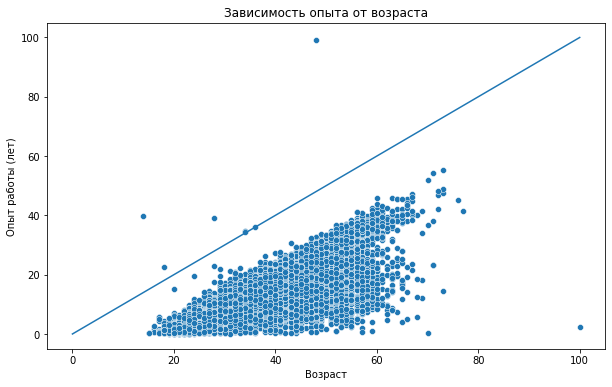

In [64]:
# Доп признак (опыт в годах)
hh_data_df['Опыт работы (лет)'] = hh_data_df['Опыт работы (месяц)'] / 12

fig = plt.figure(figsize=(10, 6))

# Линия у = х
sns.lineplot(x=[0, 100], y=[0, 100])

# Рассеяние
ax = sns.scatterplot(
    data=hh_data_df,
    x='Возраст',
    y='Опыт работы (лет)',
)

ax.set_title('Зависимость опыта от возраста');

# plt.savefig('data/img-4.8.jpg')
# plt.show()

# сколько точек выше или на прямой
mask = hh_data_df['Возраст'] - hh_data_df['Опыт работы (лет)']
print(f'наблюдений, где опыт >= возраст: {hh_data_df[mask <= 0].shape[0]}')

# Удаление более не нужного столбца
hh_data_df = hh_data_df.drop(['Опыт работы (лет)'], axis=1)

***Прямая зависимость опыта работы от возраста (что логично). Есть 7 точек, лежащих на прямой y = x или выше неё (это выбросы - либо нечестный ответ, либо ошибка данных). Есть ещё аномалия - тот самый вековой старец, который, тем не менее, поработал на своём веку совсем немного, зато который знатно портит всю картину...***

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [65]:
# очень мне нравится делать тепловую карту корреляции между всеми признаками...
fig = px.imshow(
        hh_data_df.corr(),
        text_auto=True,
        aspect="auto",
        labels=dict(color='Correlation coefficient'),
        color_continuous_scale='RdBu_r',
    )

# fig.write_image('data/img-4.9.1.jpg')
# fig.show()

<center> <img src = https://github.com/chingachguk1977/HeadHunter_TutorialPjt/blob/main/project%20files/data/img-4.9.1.jpg?raw=true alt="drawing" style="width:1000px;">

***Тут мы по сути видим любопытные зависимости и их неожиданное отсутствие. Приведу пару примеров:***


* ***Наиболее взаимосвязанные признаки здесь -- возраст и опыт работы (ну тут всё вполне логично);***
* ***Любопытно связаны готовность к командировкам и готовность к переезду. Коэфф. не очень высокий, но похоже, что одно следует из другого в бОльшей мере, чем какие-то ещё взаимосвязи в данной ситуации. При этом с возрастом готовность к переезду, скорее, падает (отр. коэфф.), что вроде бы тоже логично, люди больше готовы рассматривать командировки.***

,Готовность к переезду,ЗП (руб)
0,False,80000.0
1,True,100000.0


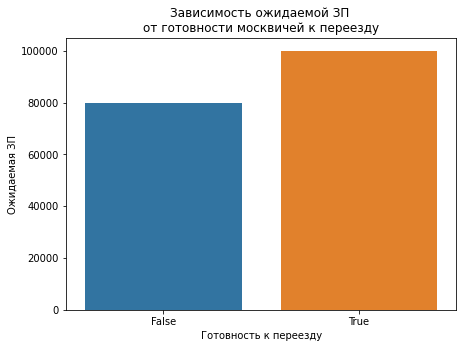

In [66]:
# хотелось бы ещё посмотреть, при какой средней зарплате (x) москвичи готовы согласиться на переезд (y)
movable_moscovites = hh_data_df[hh_data_df['Город'] == 'Москва']
move_from_moscow = movable_moscovites.groupby(by=['Готовность к переезду'], as_index=False)['ЗП (руб)'].median()

fig = plt.figure(figsize=(7, 5))
barplot = sns.barplot(
    data=move_from_moscow,
    x='Готовность к переезду',
    y='ЗП (руб)',
)

barplot.set_title('Зависимость ожидаемой ЗП \nот готовности москвичей к переезду')
barplot.set_xlabel('Готовность к переезду')
barplot.set_ylabel('Ожидаемая ЗП')

# plt.savefig('data/img-4.9.2.jpg')
# plt.show()

move_from_moscow

***Видно, что медианная ожидаемая ЗП москвичей, которые готовы к переезду (из Москвы), на 20 тыс. руб. выше, чем у тех, кто не готов к переезду. Любопытно, что за 20 тыс. они готовы переехать (я бы поначалу как раз предположил, что ожидаемая ЗП при этом должна снизиться).***

# Очистка данных

1) Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [67]:
duplicates = hh_data_df[hh_data_df.duplicated(subset=hh_data_df.columns)]
hh_data_df = hh_data_df.drop_duplicates()
duplicates.shape[0]

159

2) Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [68]:
pd.options.mode.use_inf_as_na = True
missing_data = hh_data_df.isnull().sum()
display(missing_data[missing_data > 0])

Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Опыт работы (месяц)                170
dtype: int64

3) Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [69]:
# удаляем записи с категориальными пропусками
hh_data_df = hh_data_df.dropna(
    subset=[
        'Последнее/нынешнее место работы', 
        'Последняя/нынешняя должность',
        ],
)
# заполняем записи с числовыми пропусками медианой
hh_data_df['Опыт работы (месяц)'] = hh_data_df['Опыт работы (месяц)'].fillna(
    hh_data_df['Опыт работы (месяц)'].median()
    )
# результирующее среднее значение в столбце «Опыт работы (месяц)» после заполнения пропусков
mean_exp_after_cleanup = hh_data_df['Опыт работы (месяц)'].mean()
print(f'Теперь среднее значение в столбце «Опыт работы (месяц)» = {round(mean_exp_after_cleanup)}')

Теперь среднее значение в столбце «Опыт работы (месяц)» = 114


4) Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [70]:
salary_outliers = (hh_data_df['ЗП (руб)'] > 1_000_000) | (hh_data_df['ЗП (руб)'] < 1_000)
mask = salary_outliers[salary_outliers == True]
hh_data_df = hh_data_df.drop(mask.index, inplace=False)
num_of_outliers = mask.shape[0]
print(f'Кол-во выбросов по з/п (меньше тыщи и больше мильёна) = {num_of_outliers}')

Кол-во выбросов по з/п (меньше тыщи и больше мильёна) = 89


5) В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [71]:
exp_outliers = (hh_data_df['Опыт работы (месяц)']/12 > hh_data_df['Возраст'])
mask = exp_outliers[exp_outliers == True]
hh_data_df = hh_data_df.drop(mask.index, inplace=False)
num_of_outliers = mask.shape[0]
print(f'Кол-во выбросов по опыту (где работал еще до рождения) = {num_of_outliers}')

Кол-во выбросов по опыту (где работал еще до рождения) = 7


6) В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

Число выбросов в возрасте по методу z-отклонений: 3
Асимметрия распределения = 0.45


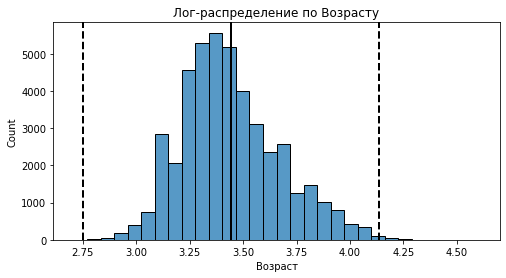

In [72]:
def outliers_z_score_mod(
    data, 
    feature, 
    log_scale=False, 
    left_deviation=0, 
    right_deviation=0):
    """Calculates the outliers in the DataFrame based on Z-Deviation Method, by the given column (feature)

    Args:
        data (DataFrame): the DF to work with
        feature (str): the feature (column) used to find outliers
        log_scale (bool, optional): Specifies whether or not log scale is to be used. Defaults to False.
        left_deviation (int, optional): Deviation from standard Sigma to the left (3 Sigmas are used if deviation is 0). Defaults to 0.
        right_deviation (int, optional): Deviation from standard Sigma to the right (3 Sigmas are used if deviation is 0). Defaults to 0.

    Returns:
        The tuple of two parts of the original DF: first one with outliers only and second one without outliers.
    """

    if log_scale:
        x = np.log(data[feature]) #+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - (left_deviation + 3) * sigma
    upper_bound = mu + (right_deviation + 3) * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

    
age_outliers, age_cleaned = outliers_z_score_mod(hh_data_df, 'Возраст', right_deviation=1, log_scale=True)
print(f'Число выбросов в возрасте по методу z-отклонений: {age_outliers.shape[0]}')

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_age = np.log(hh_data_df['Возраст'])
skew = log_age.skew()
histplot = sns.histplot(log_age, bins=30, ax=ax)
histplot.axvline(log_age.mean(), color='k', lw=2)
histplot.axvline(log_age.mean()+ 3 * log_age.std(), color='k', ls='--', lw=2)
histplot.axvline(log_age.mean()- 3 * log_age.std(), color='k', ls='--', lw=2)
histplot.set_title('Лог-распределение по Возрасту');

# plt.savefig('data/img-6.0.jpg')

print(f'Асимметрия распределения = {round(skew, 2)}')

***Немножко уехавшее влево нормальное распределение. Справа от моды больше наблюдений, чем слева. То есть распределение имеет правостороннюю асимметрию. Можно сказать, что в данных представлено гораздо больше людей более молодых, чем модальный возраст. Даже визуально заметно, что их почти в полтора раза больше, чем тех, кто старше модального возраста.***

In [73]:
# сохраним чистый ДФ для потомков
hh_data_df.to_csv('data/hh_good_df.csv', index=False)